**. A Haberman's Survival Data Set
. Dataset contains the cases from a study that was conducted between 1958 and 1970 at the University of Chicago's      Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
. objective- to predict whether a patient will survive after 5years after the operation or not on the basis of age, number of positive lymph nodes and year of operation(Classification Task)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
os.chdir("D:\\applied AI")

br_can=pd.read_csv("haberman.csv")
br_can.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**To make data more readable we should rename the columns names as year of operation ,number of positive lymph nodes survival status.

In [4]:
br_can.rename(columns={'year':'year_of_operation','nodes':'number_of_positive_lymph_nodes','status':'survival_status'},inplace=True)
print(br_can.columns)
br_can.head()


Index(['age', 'year_of_operation', 'number_of_positive_lymph_nodes',
       'survival_status'],
      dtype='object')


,age,year_of_operation,number_of_positive_lymph_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [28]:
br_can.shape

(306, 4)

**Features or variables are 3 in total namely age, year of operation, number of positive lymph nodes

**Datapoints or Observation is a 3-dimensional vector here total of 306 in number

**class Label/Dependent variable is survival status i.e. whether the patient survived after 5 years or not
where 1 is that the patient survived more than 5 years and 2 is the patient didn't survived 5 years or more

**Lymph Nodes--> Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.When the lymph nodes are free, or clear of cancer the test results are negative.If lymph nodes have some cancer cells in them they are called positive.( Reference from https://www.breastcancer.org/diagnosis/lymph_nodes

 

In [5]:
br_can['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

**our br_can dataset is imbalanced because the value count of 1 is 225 and that of 2 is 81

In [7]:
#since our class label is whether a patient survived after 5 years or not so to make out dateset more meaningful we should convert 1 to yes and 2 to no
br_can['survival_status']=br_can['survival_status'].map({1:'yes',2:'no'})
#converting datatype from integer to categorial type
br_can['survival_status']=br_can['survival_status'].astype('category')
br_can.head()

,age,year_of_operation,number_of_positive_lymph_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


# Bivariate Analysis
## 3D Scatter Plot

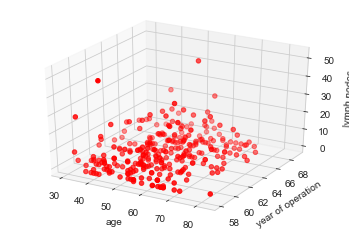

In [52]:
# 3D scatter plot
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
g1=br_can.loc[:,'age']
g2=br_can.loc[:,'year_of_operation']
g3=br_can.loc[:,'number_of_positive_lymph_nodes']
ax.scatter(g1, g2, g3, c='r', marker='o')

ax.set_xlabel('age')
ax.set_ylabel('year of operation')
ax.set_zlabel('lymph nodes')
plt.show()

**2D scatter plot between age and survival status

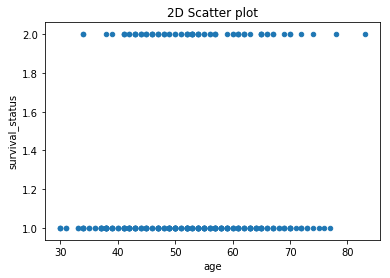

In [20]:
br_can1=pd.read_csv("haberman.csv")
br_can1.rename(columns={'year':'year_of_operation','nodes':'number_of_positive_lymph_nodes','status':'survival_status'},inplace=True)
br_can1.plot(kind='Scatter',x='age',y='survival_status')
plt.title('2D Scatter plot')
plt.show()

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


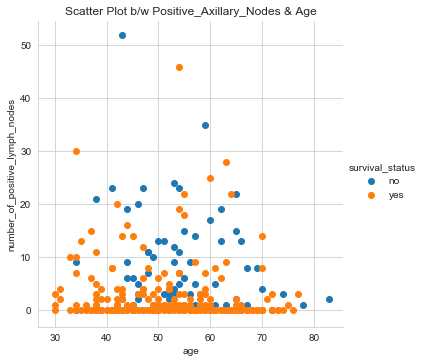

In [21]:
#Scatte Plot between Age and Positive lymph nodes
sns.set_style("whitegrid");
sns.FacetGrid(br_can,hue="survival_status", size=5) \
   .map(plt.scatter, "age", "number_of_positive_lymph_nodes") \
   .add_legend();
plt.title('Scatter Plot b/w Positive_Axillary_Nodes & Age')
plt.show();

**Observation
number of positive lymph nodes close to 0(around 0-3) have high chances of survival.

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


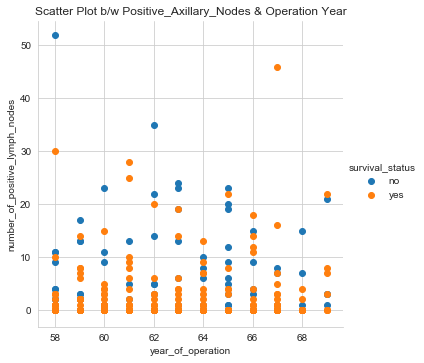

In [22]:
#Scatte Plot between Operation Year and Positive lymph nodes
sns.set_style("whitegrid");
sns.FacetGrid(br_can,hue="survival_status", size=5) \
   .map(plt.scatter, "year_of_operation", "number_of_positive_lymph_nodes") \
   .add_legend();
plt.title('Scatter Plot b/w Positive_Axillary_Nodes & Operation Year')
plt.show();

**Doesn't Give any Important Information

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


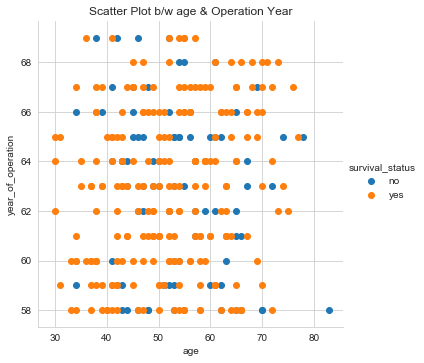

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(br_can,hue="survival_status", size=5) \
   .map(plt.scatter, "age", "year_of_operation") \
   .add_legend();
plt.title('Scatter Plot b/w age & Operation Year')
plt.show();

## Pair Plots

C:\Users\aksha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


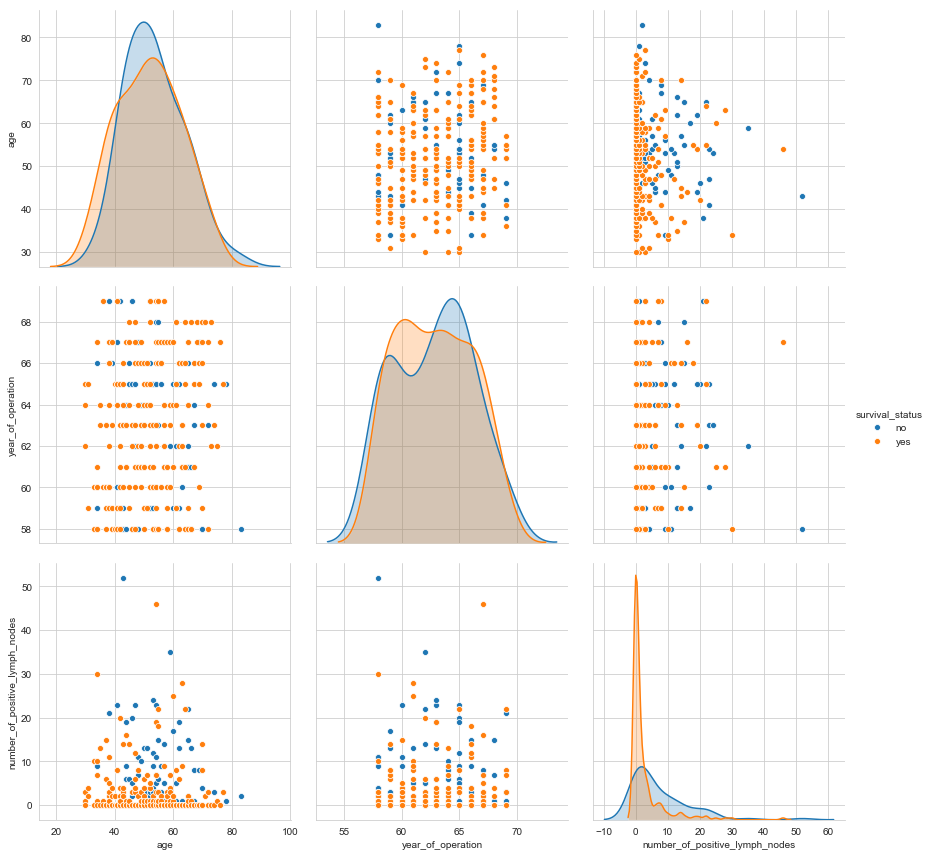

In [23]:
#pair plot
sns.set_style("whitegrid")
sns.pairplot(br_can,hue='survival_status',size=4)
plt.show()

# Observations from Bivariate Analysis
**Age Below around 30-38 has the highest chances of survival in terms of age feature.

# High Level Statistics


In [36]:
print(br_can.describe())
print(br_can.iloc[:,-1].value_counts(normalize=True))

              age  year_of_operation  number_of_positive_lymph_nodes  \
count  306.000000         306.000000                      306.000000   
mean    52.457516          62.852941                        4.026144   
std     10.803452           3.249405                        7.189654   
min     30.000000          58.000000                        0.000000   
25%     44.000000          60.000000                        0.000000   
50%     52.000000          63.000000                        1.000000   
75%     60.750000          65.750000                        4.000000   
max     83.000000          69.000000                       52.000000   

       survival_status  
count       306.000000  
mean          1.264706  
std           0.441899  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           2.000000  
1    0.735294
2    0.264706
Name: survival_status, dtype: float64


# OBSERVATIONS:-
**AGE- 1.age of the patient ranges from 30 years to 83 years with the mean(central tendency)age of 52 years.
2. std.deviation(range or spread) is 10.83

**Year of operation- most of the operations occured between 1958 to 1969 with mean year as 1963
 
**Number of positive nodes-1. maximum number of positive nodes is 52
**2. About 75% patients has positive nodes less than 5

**Survival Status- around 73% patient lived more than 5 years and 26% patient lived less than 5 years

# Univariate Analysis

## Histogram

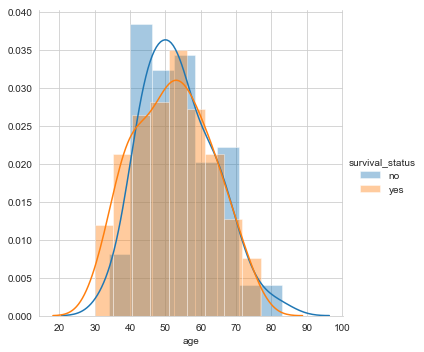

In [59]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(br_can, hue="survival_status", size=5).map(sns.distplot, "age").add_legend();
plt.show();


**Observation:-
Since the distribution is overlapping we can't build a model using if-else conditions.

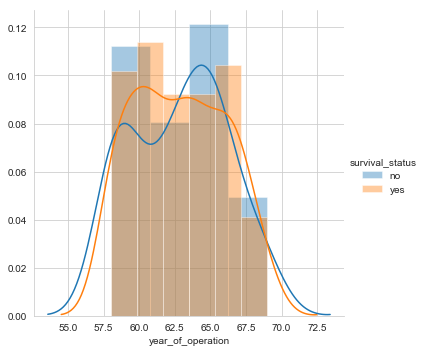

In [58]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(br_can, hue="survival_status", size=5).map(sns.distplot, "year_of_operation").add_legend();
plt.show();

**Observation
Data is highly overlapped and hence we can't build a model using if-else condition.

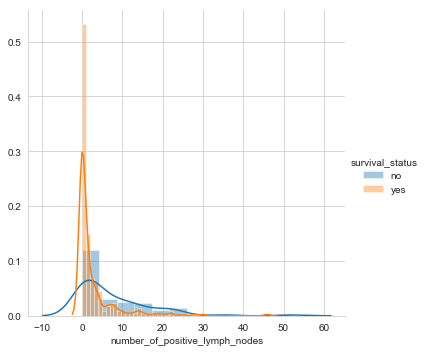

In [57]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(br_can, hue="survival_status", size=5).map(sns.distplot, "number_of_positive_lymph_nodes").add_legend();
plt.show();

**By looking at the above histogram we observe that
1. if the number of positive lymph nodes is between 0-4 they have higher chances of patient dying before 5 years
**2. data is overlapped and hence we can build a model using a if-else condition 

## CDF(orange line) PDF(blue line)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


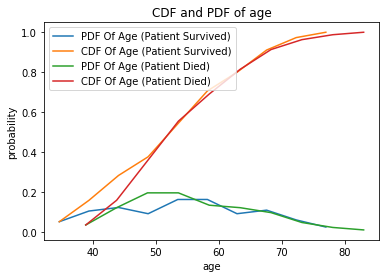

In [10]:
pos=br_can[br_can['survival_status']=='yes']

neg=br_can[br_can['survival_status']=='no']
counts, bin_edges=np.histogram(pos['age'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Age (Patient Survived)')
plt.legend()

counts, bin_edges=np.histogram(neg['age'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Age (Patient Died)')
plt.legend()

plt.xlabel('age')
plt.ylabel('probability')
plt.title('CDF and PDF of age')
plt.show()

**Observation
Both PDF and CDF are Overlapping and by looking at the CDF of patient died we can say that almost all the patients above 80years have died,and around 70% of thee people of age around 55 to 60 years have survied after 5 years.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


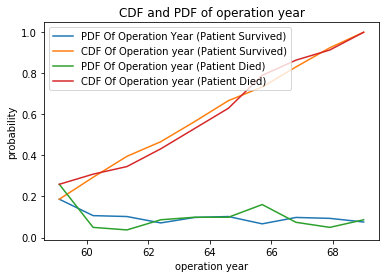

In [13]:
counts, bin_edges=np.histogram(pos['year_of_operation'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Operation Year (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Operation year (Patient Survived)')
plt.legend()

counts, bin_edges=np.histogram(neg['year_of_operation'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Operation year (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Operation year (Patient Died)')
plt.legend()

plt.xlabel('operation year')
plt.ylabel('probability')
plt.title('CDF and PDF of operation year')
plt.show()

**Since both the cases are evenly distributed along the operation year and also highly overlapped except for the fact the patient having operation between year 1960 to 1962 have higher chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


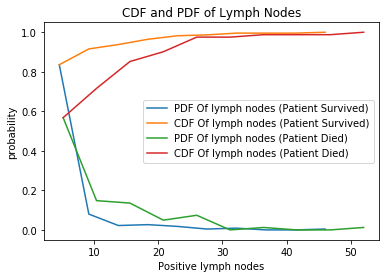

In [14]:
counts, bin_edges=np.histogram(pos['number_of_positive_lymph_nodes'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of lymph nodes (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of lymph nodes (Patient Survived)')
plt.legend()

counts, bin_edges=np.histogram(neg['number_of_positive_lymph_nodes'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of lymph nodes (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of lymph nodes (Patient Died)')
plt.legend()

plt.xlabel('Positive lymph nodes')
plt.ylabel('probability')
plt.title('CDF and PDF of Lymph Nodes')
plt.show()

**Chances of survival of patients when lymph nodes is less than3 is around 80 %
When the lymph nodes is more than 40 there is high chances of death of the patient.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


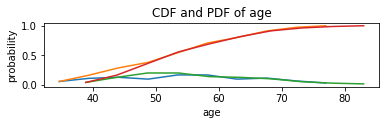

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


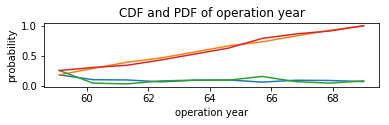

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


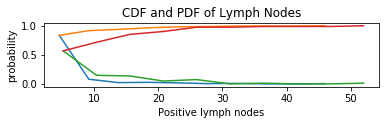

In [17]:
counts, bin_edges=np.histogram(pos['age'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(3,1,1)
plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Age (Patient Survived)')

counts, bin_edges=np.histogram(neg['age'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Age (Patient Died)')

plt.xlabel('age')
plt.ylabel('probability')
plt.title('CDF and PDF of age')
plt.show()

#year of operation
counts, bin_edges=np.histogram(pos['year_of_operation'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(3,1,2)
plt.plot(bin_edges[1:],pdf,label='PDF Of Operation Year (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Operation year (Patient Survived)')


counts, bin_edges=np.histogram(neg['year_of_operation'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of Operation year (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Operation year (Patient Died)')

plt.xlabel('operation year')
plt.ylabel('probability')
plt.title('CDF and PDF of operation year')
plt.show()

#No.of positive lymph nodes

counts, bin_edges=np.histogram(pos['number_of_positive_lymph_nodes'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.subplot(3,1,3)
plt.plot(bin_edges[1:],pdf,label='PDF Of lymph nodes (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of lymph nodes (Patient Survived)')

counts, bin_edges=np.histogram(neg['number_of_positive_lymph_nodes'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Of lymph nodes (Patient Died)');
plt.plot(bin_edges[1:], cdf,label='CDF Of lymph nodes (Patient Died)')

plt.xlabel('Positive lymph nodes')
plt.ylabel('probability')
plt.title('CDF and PDF of Lymph Nodes')
plt.show()

## Box Plots and Whiskers

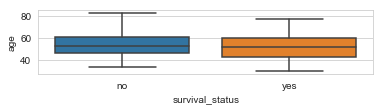

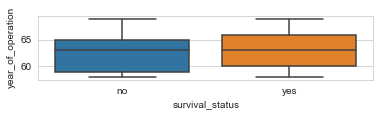

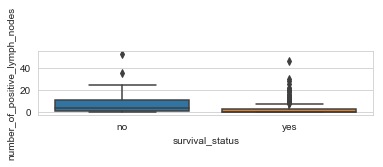

In [80]:
#age
plt.subplot(3,1,1)
sns.boxplot(x='survival_status',y='age',data=br_can)
plt.show()
#year_of_operation
plt.subplot(3,1,2)
sns.boxplot(x='survival_status',y='year_of_operation',data=br_can)
plt.show()
#number_of_positive_lymph_nodes
plt.subplot(3,1,3)
sns.boxplot(x='survival_status',y='number_of_positive_lymph_nodes',data=br_can)
plt.show()

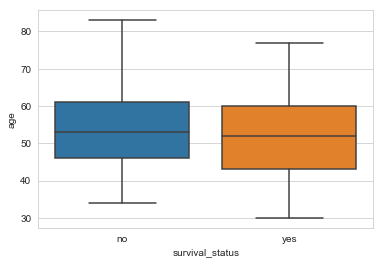

In [81]:
#age
sns.boxplot(x='survival_status',y='age',data=br_can)
plt.show()

**25th percentile to 75th percentile of patients not surviving above 5 years after the operation is between 45 to 62 years with mean age as 54 years

**25th percentile to 75th percentile of patients surviving above 5 years after the operation is between 42 to 60 years with mean age as 52 years

**Whiskers of the No are farther than yes

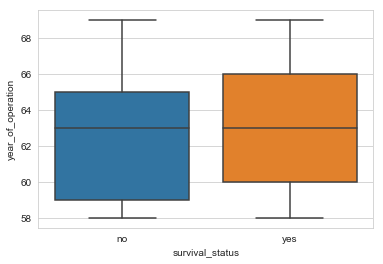

In [82]:
#year_of_operation
sns.boxplot(x='survival_status',y='year_of_operation',data=br_can)
plt.show()

**25th percentile to 75th percentile of patients not surviving above 5 years after the operation is between 1959 to 1965 with mean as 1963 years

**25th percentile to 75th percentile of patients surviving above 5 years after the operation is between 1960 to 1966 with mean as 1963 years

**Mean year of operation of both yes and no is same

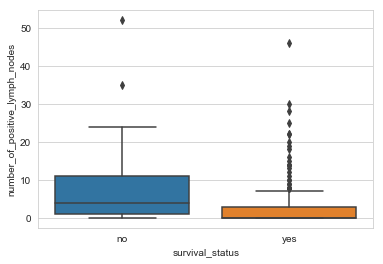

In [83]:
#number_of_positive_lymph_nodes
sns.boxplot(x='survival_status',y='number_of_positive_lymph_nodes',data=br_can)
plt.show()

**25th percentile to 75th percentile of patients not surviving above 5 years after the operation have poitive lymph nodes between 1 to 11 with mean of 4

**25th percentile to 75th percentile of patients surviving above 5 years after the operation have poitive lymph nodes between 0 to 3


## Violin plots

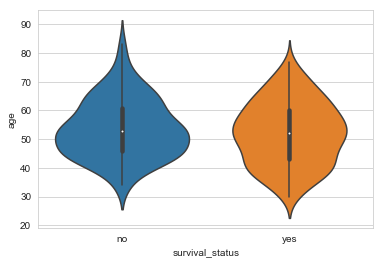

In [84]:
#age
sns.violinplot(x='survival_status',y='age',data=br_can,size=9)
plt.show()

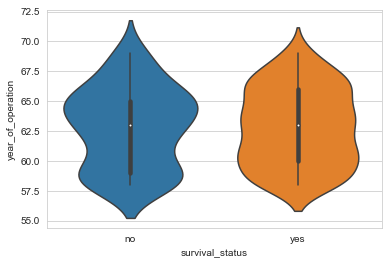

In [85]:
#year_of_operation
sns.violinplot(x='survival_status',y='year_of_operation',data=br_can,size=8)
plt.show()

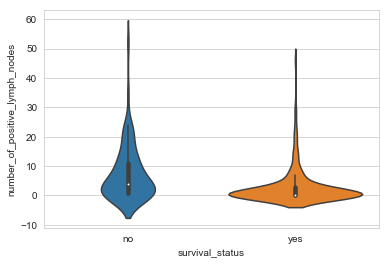

In [86]:
#number_of_positive_lymph_nodes
sns.violinplot(x='survival_status',y='number_of_positive_lymph_nodes',data=br_can,size=10)
plt.show()

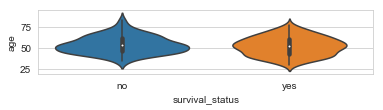

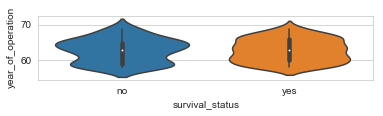

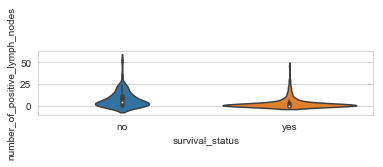

In [87]:
#age
plt.subplot(3,1,1)
sns.violinplot(x='survival_status',y='age',data=br_can,size=9)
plt.show()


#year_of_operation
plt.subplot(3,1,2)
sns.violinplot(x='survival_status',y='year_of_operation',data=br_can,size=8)
plt.show()


#number_of_positive_lymph_nodes
plt.subplot(3,1,3)
sns.violinplot(x='survival_status',y='number_of_positive_lymph_nodes',data=br_can,size=10)
plt.show()

**Observations
Since the datapoints are scattered around same range of values not a great deal of information can be extracted from this

**Number of positive lymph nodes close to 0-4have higher chances of survival according to violin plots

# Conclusion that could be drawn from all the plots and datasets are

**1- Number of positive lymph nodes and then the age feature are two important features in determing whether a patient will survive for more than 5 years of not

**2-Age between 30-40 has highest survival rates and age of the patients above 80 years have the least survival rate

**3- Most number of successful treatment is done between the year 1960-1962.

**4- Number of positive lymph nodes between 0-3 chances of survival is around 80% and number of positive lymph nodes above 30 indicates that chances of patient surviving is very less.

# References

**1-https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis ==> [column headings ]

**2-https://www.kaggle.com/bholanath222/starter-haberman-s-survival-data-set-06078f28-9 ==>[code for 2D scatter plot and CDF/PDF(different cdfs and pdfs for patient dying and surviving respectively)]

**3-https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis ==>[replacing 1 with 'yes' and 0 with 'no']